# Machine Learning

## Customer Churn prediction using Decision Tree Classifier with Grid Search and Cross-Validation

#### Import required libraries and packages

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.metrics import plot_confusion_matrix

import warnings
warnings.filterwarnings('ignore')

#### Read a csv file as pandas DataFrame

In [2]:
data_frame = pd.read_csv("Churn.csv")

display(data_frame.head(10))
print(data_frame.shape)

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,no,no,yes,110,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,no,no,yes,123,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,no,no,no,114,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,no,yes,no,71,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,no,yes,no,113,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626
5,118,0,223.4,220.6,203.9,6.3,0,no,yes,no,98,37.98,101,18.75,118,9.18,6,1.70,AL,510,391-8027
6,121,24,218.2,348.5,212.6,7.5,3,no,no,yes,88,37.09,108,29.62,118,9.57,7,2.03,MA,510,355-9993
7,147,0,157.0,103.1,211.8,7.1,0,no,yes,no,79,26.69,94,8.76,96,9.53,6,1.92,MO,415,329-9001
8,117,0,184.5,351.6,215.8,8.7,1,no,no,no,97,31.37,80,29.89,90,9.71,4,2.35,LA,408,335-4719
9,141,37,258.6,222.0,326.4,11.2,0,no,yes,yes,84,43.96,111,18.87,97,14.69,5,3.02,WV,415,330-8173


(3333, 21)


#### Data Preprocessing

In [3]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account_Length  3333 non-null   int64  
 1   Vmail_Message   3333 non-null   int64  
 2   Day_Mins        3333 non-null   float64
 3   Eve_Mins        3333 non-null   float64
 4   Night_Mins      3333 non-null   float64
 5   Intl_Mins       3333 non-null   float64
 6   CustServ_Calls  3333 non-null   int64  
 7   Churn           3333 non-null   object 
 8   Intl_Plan       3333 non-null   object 
 9   Vmail_Plan      3333 non-null   object 
 10  Day_Calls       3333 non-null   int64  
 11  Day_Charge      3333 non-null   float64
 12  Eve_Calls       3333 non-null   int64  
 13  Eve_Charge      3333 non-null   float64
 14  Night_Calls     3333 non-null   int64  
 15  Night_Charge    3333 non-null   float64
 16  Intl_Calls      3333 non-null   int64  
 17  Intl_Charge     3333 non-null   f

- Investigate unique values in object data type

In [4]:
print(data_frame['Churn'].unique())
print(data_frame['Intl_Plan'].unique())
print(data_frame['Vmail_Plan'].unique())

['no' 'yes']
['no' 'yes']
['yes' 'no']


- Encoding doesn't improve our model performance, so we changed the values instead of encoding

In [5]:
# converting to 0 and 1
data_frame = data_frame.drop(['State', 'Area_Code', 'Phone'], axis=1)

data_frame['Churn'] = data_frame['Churn'].replace(({'no':0, 'yes':1}))
data_frame['Intl_Plan'] = data_frame['Intl_Plan'].replace(({'no':0, 'yes':1}))
data_frame['Vmail_Plan'] = data_frame['Vmail_Plan'].replace(({'no':0, 'yes':1}))

display(data_frame.head(10))
print(data_frame.shape)

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge
0,128,25,265.1,197.4,244.7,10.0,1,0,0,1,110,45.07,99,16.78,91,11.01,3,2.70
1,107,26,161.6,195.5,254.4,13.7,1,0,0,1,123,27.47,103,16.62,103,11.45,3,3.70
2,137,0,243.4,121.2,162.6,12.2,0,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29
3,84,0,299.4,61.9,196.9,6.6,2,0,1,0,71,50.90,88,5.26,89,8.86,7,1.78
4,75,0,166.7,148.3,186.9,10.1,3,0,1,0,113,28.34,122,12.61,121,8.41,3,2.73
5,118,0,223.4,220.6,203.9,6.3,0,0,1,0,98,37.98,101,18.75,118,9.18,6,1.70
6,121,24,218.2,348.5,212.6,7.5,3,0,0,1,88,37.09,108,29.62,118,9.57,7,2.03
7,147,0,157.0,103.1,211.8,7.1,0,0,1,0,79,26.69,94,8.76,96,9.53,6,1.92
8,117,0,184.5,351.6,215.8,8.7,1,0,0,0,97,31.37,80,29.89,90,9.71,4,2.35
9,141,37,258.6,222.0,326.4,11.2,0,0,1,1,84,43.96,111,18.87,97,14.69,5,3.02


(3333, 18)


In [6]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account_Length  3333 non-null   int64  
 1   Vmail_Message   3333 non-null   int64  
 2   Day_Mins        3333 non-null   float64
 3   Eve_Mins        3333 non-null   float64
 4   Night_Mins      3333 non-null   float64
 5   Intl_Mins       3333 non-null   float64
 6   CustServ_Calls  3333 non-null   int64  
 7   Churn           3333 non-null   int64  
 8   Intl_Plan       3333 non-null   int64  
 9   Vmail_Plan      3333 non-null   int64  
 10  Day_Calls       3333 non-null   int64  
 11  Day_Charge      3333 non-null   float64
 12  Eve_Calls       3333 non-null   int64  
 13  Eve_Charge      3333 non-null   float64
 14  Night_Calls     3333 non-null   int64  
 15  Night_Charge    3333 non-null   float64
 16  Intl_Calls      3333 non-null   int64  
 17  Intl_Charge     3333 non-null   f

#### Separating the features and target variable

In [7]:
data_frame['Churn'].value_counts()

0    2850
1     483
Name: Churn, dtype: int64

In [8]:
X = data_frame.drop('Churn', axis=1)
y = data_frame[['Churn']]

print(X.shape, y.shape)

(3333, 17) (3333, 1)


#### Separating the features and target variable

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=42, stratify=y)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2333, 17) (1000, 17) (2333, 1) (1000, 1)


#### Stratification

In [10]:
class_0_train = y_train['Churn'].value_counts().values[0]
class_1_train = y_train['Churn'].value_counts().values[1]

train_ratio = class_1_train/class_0_train
print('Train Ratio:', train_ratio)


class_0_test = y_test['Churn'].value_counts().values[0]
class_1_test = y_test['Churn'].value_counts().values[1]

test_ratio = class_1_test/class_0_test
print('Test Ratio: ', test_ratio)

Train Ratio: 0.16942355889724312
Test Ratio:  0.1695906432748538


#### Decision Tree Classifier

In [11]:
model = DecisionTreeClassifier(random_state=42)
model = model.fit(X_train, y_train)

#### Prediction

In [12]:
y_pred = model.predict(X_test)

#### Comparing prediction with test data

In [13]:
y_test['probability'] = np.round(model.predict_proba(X_test)[:,1], 2)
y_test['predicted_Churn'] = y_pred

display(y_test.sample(10))

,Churn,probability,predicted_Churn
1756,0,0.0,0
744,0,0.0,0
1888,0,0.0,0
751,0,0.0,0
452,0,0.0,0
898,0,0.0,0
2794,1,0.0,0
288,0,0.0,0
2844,0,0.0,0
2035,0,0.0,0


In [14]:
test = pd.concat([X_test, y_test], axis=1)
display(test.sample(10))

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,Churn,probability,predicted_Churn
2487,111,0,152.2,137.2,185.9,9.8,0,0,0,114,25.87,102,11.66,97,8.37,3,2.65,0,0.0,0
2353,101,0,133.5,219.6,210.0,11.7,1,1,0,51,22.70,96,18.67,74,9.45,4,3.16,0,0.0,0
610,91,0,231.8,150.6,269.2,11.6,3,0,0,120,39.41,106,12.80,129,12.11,7,3.13,0,0.0,0
2547,72,0,139.9,223.6,240.8,12.7,2,0,0,117,23.78,96,19.01,93,10.84,4,3.43,0,0.0,0
1213,126,0,228.7,168.7,223.5,11.8,1,0,0,102,38.88,99,14.34,100,10.06,4,3.19,0,0.0,0
697,63,0,149.3,273.6,206.6,9.1,0,0,0,104,25.38,75,23.26,72,9.30,4,2.46,0,0.0,0
3248,93,0,146.3,216.6,233.0,11.5,0,0,0,85,24.87,95,18.41,82,10.49,3,3.11,0,0.0,0
107,93,21,117.9,164.5,217.0,9.8,1,0,1,131,20.04,115,13.98,86,9.76,3,2.65,0,0.0,0
477,141,23,149.7,162.5,220.3,7.6,3,0,1,112,25.45,118,13.81,115,9.91,2,2.05,0,0.0,0
116,64,0,162.6,152.3,57.5,14.2,1,0,0,83,27.64,109,12.95,122,2.59,3,3.83,0,0.0,0


#### Data Transformation using StandardScaler or MinMaxScaler

In [15]:
# scaler = StandardScaler() 
# scaler = MinMaxScaler()

# print(scaler.fit(test))

In [16]:
# print(scaler.mean_)
# print(scaler.data_max_) 

In [17]:
# print(scaler.transform(test.head(10)))

- Data transformation doesn't have any impact on model performance, so skipped it

#### Tree diagram

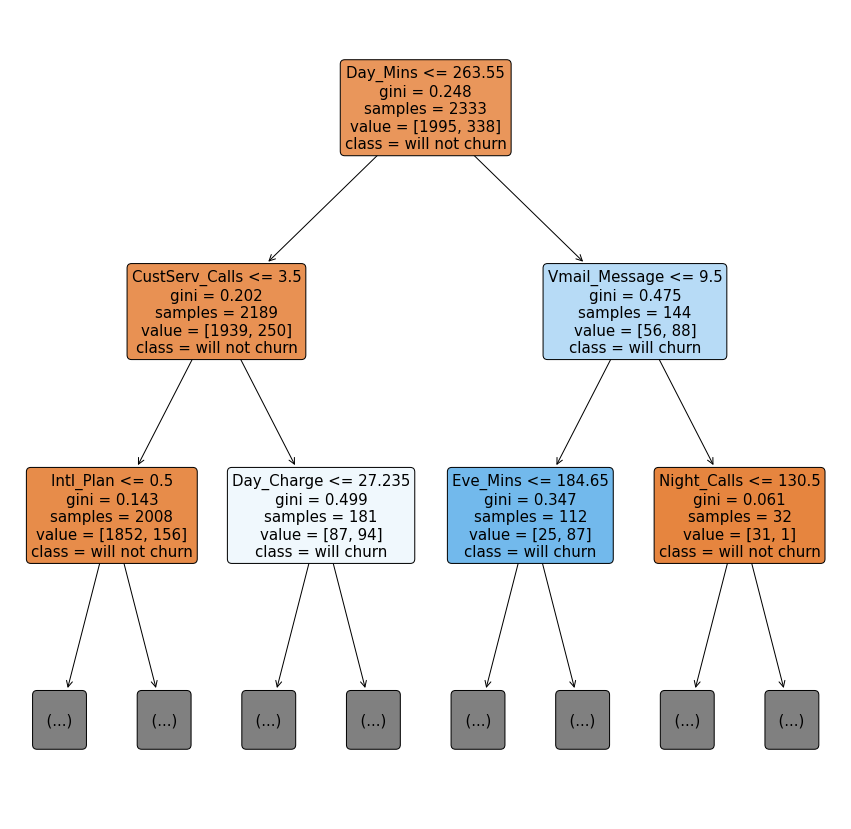

In [18]:
plt.figure(figsize = (15, 15))

plot_tree(model, 
          filled=True,
          rounded=True,
          class_names = ["will not churn", "will churn"],
          feature_names = X.columns,
          max_depth=2, 
          fontsize=15)

plt.show()

#### Grid Search and Cross Validation

In [19]:
parameters = {'criterion': ['gini','entropy'],
              'max_depth': np.arange(3,8,1).tolist()}

model = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=model,
                           param_grid=parameters,
                           scoring="accuracy",
                           cv=5,
                           n_jobs=-1)

grid_result = grid_search.fit(X_train, y_train)

In [20]:
y_pred = np.round(grid_result.predict(X_test), 2)

#### hyperparameter 

In [21]:
grid_result.best_params_

{'criterion': 'entropy', 'max_depth': 6}

In [22]:
cv_result = pd.DataFrame(grid_result.cv_results_)
cv_result = cv_result[['param_criterion', 'param_max_depth',
                       'split0_test_score',
                       'split1_test_score', 'split2_test_score', 'split3_test_score',
                       'split4_test_score', 'mean_test_score', 'std_test_score',
                       'rank_test_score']]
cv_result = cv_result.sort_values(by='rank_test_score')
display(cv_result)
print(cv_result.columns)

,param_criterion,param_max_depth,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
8,entropy,6,0.944325,0.925054,0.946467,0.954936,0.920601,0.938276,0.013179,1
4,gini,7,0.940043,0.925054,0.929336,0.957082,0.937768,0.937856,0.011054,2
2,gini,5,0.937901,0.914347,0.946467,0.946352,0.942060,0.937425,0.011965,3
9,entropy,7,0.933619,0.927195,0.946467,0.931330,0.942060,0.936134,0.007088,4
3,gini,6,0.940043,0.925054,0.940043,0.944206,0.924893,0.934848,0.008205,5
7,entropy,5,0.940043,0.912206,0.940043,0.937768,0.937768,0.933566,0.010728,6
1,gini,4,0.907923,0.914347,0.935760,0.916309,0.918455,0.918559,0.009293,7
6,entropy,4,0.907923,0.914347,0.929336,0.916309,0.916309,0.916845,0.006963,8
0,gini,3,0.886510,0.905782,0.920771,0.894850,0.899142,0.901411,0.011525,9
5,entropy,3,0.886510,0.905782,0.907923,0.894850,0.873391,0.893691,0.012757,10


Index(['param_criterion', 'param_max_depth', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')


## Confusion Matrix

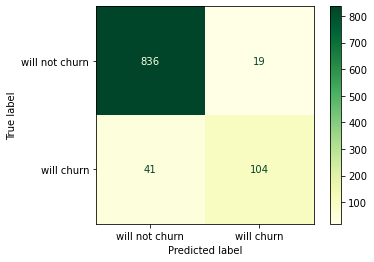

In [23]:
plot_confusion_matrix(grid_result, 
                      X_test, 
                      y_test['Churn'], 
                      display_labels=["will not churn", "will churn"],
                      cmap='YlGn')
plt.show()

#### ROC curve, AUC

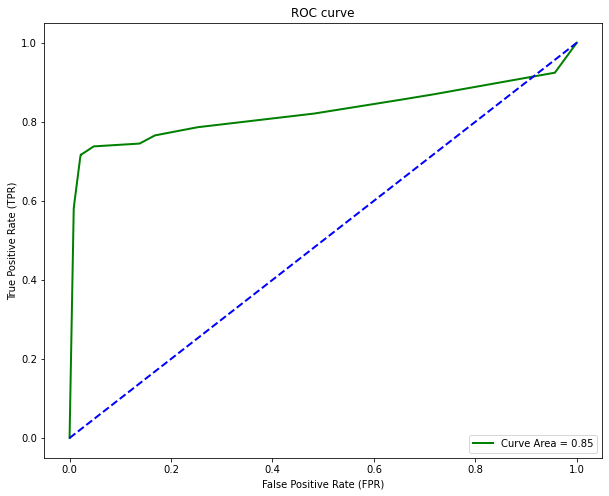

In [24]:
fpr, tpr, thr = roc_curve(y_test['Churn'], grid_result.predict_proba(X_test)[:,1])
auc = np.round(roc_auc_score(y_test['Churn'], y_pred), 2)

plt.figure(figsize=(10, 8))
plt.plot(fpr, 
         tpr, 
         color='green', 
         lw=2, 
         label="Curve Area = " +str(auc))

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

#### Classification report

In [25]:
print(classification_report(y_test['Churn'], y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       855
           1       0.85      0.72      0.78       145

    accuracy                           0.94      1000
   macro avg       0.90      0.85      0.87      1000
weighted avg       0.94      0.94      0.94      1000



#### Accuracy, Precision, Recall, F1 score

In [26]:
print('Accuracy: ', (accuracy_score(y_test['Churn'], y_pred)))

precision_ = precision_score(y_test['Churn'], y_pred)
print("Precision: ", precision_)

recall_ = recall_score(y_test['Churn'], y_pred)
print("Recall: ", recall_)
           
f1_score__ = f1_score(y_test['Churn'], y_pred)
print("f1 score: ", f1_score__)

Accuracy:  0.94
Precision:  0.8455284552845529
Recall:  0.7172413793103448
f1 score:  0.7761194029850746


- Churning customer can be predicted with 94% accuracy with our model.